In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
print("\nQ1a: ")
df = pd.read_excel('pone.0212445.s004.xlsx', sheet_name='estimates', skiprows=1)

# Filter rows by Estimate == 'Survey'
survey_data = df[df['Estimate'] == 'Survey']

# Calculate the total NoPLHIV for the Survey estimate
total_no_plhiv_survey = survey_data['NoPLHIV'].sum()

print(f'Total number of PLHIV all listed districts according to the Survey estimate: {total_no_plhiv_survey}')



Q1a: 
Total number of PLHIV all listed districts according to the Survey estimate: 6409903


In [10]:
print("\nQ1b: ")

# Filter rows by district == Xhariep
xhariep_data = df[df['District'] == 'Xhariep']

# Calculate the average NoPLHIV for the two estimates
average_no_plhiv = xhariep_data.groupby('Estimate')['NoPLHIV'].mean()

print(f'Average number of PLHIV for Xhariep district:\n{average_no_plhiv}')


Q1b: 
Average number of PLHIV for Xhariep district:
Estimate
Fay-Heriott   12718.00
Survey        11777.00
Name: NoPLHIV, dtype: float64


In [49]:
print("\nQ1c: ")

# Calculate the total population using NoPLHIV and prev
total_population = df['NoPLHIV'] / (df['Prevalence_%'] / 100)

# Subtract NoPLHIV from total pop to get NoNotHIH
df['NoNotHIV'] = total_population - df['NoPLHIV']

# Convert output from scientific notion to decimal points
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the DataFrame with the new columns
print(df)

# Add the new column to the excel spreadsheet
# df.to_excel('pone.0212445.s004.xlsx', sheet_name='estimates', index=False)



Q1c: 
                     District Code     Estimate  Prevalence_%  Prevalence_LCL  \
0                Buffalo City  BUF       Survey         13.60           10.27   
1                Buffalo City  BUF  Fay-Heriott         13.50           11.03   
2           City of Cape Town  CPT       Survey          5.20            3.04   
3           City of Cape Town  CPT  Fay-Heriott          6.02            4.34   
4                  West Coast  DC1       Survey          2.70            0.00   
..                        ...  ...          ...           ...             ...   
99                   Mangaung  MAN  Fay-Heriott          9.15            6.73   
100  Nelson Mandela Bay Metro  NMA       Survey          8.30            3.40   
101  Nelson Mandela Bay Metro  NMA  Fay-Heriott          9.05            6.13   
102           City of Tshwane  TSH       Survey         11.70            7.39   
103           City of Tshwane  TSH  Fay-Heriott         11.02            8.26   

     Prevalence_UCL 

In [48]:
print("\nQ1d: ")

# Filter rows for districts containing "city" or "metro" in the name
city_districts = df[df['District'].str.contains('city|metro', case=False, regex=True)]

# Calculate the total NoPLHIV in all the cities
total_no_plhiv_cities = city_districts['NoPLHIV'].sum()

print(f'Total number of PLHIV in all districts containing "city" or "metro": {total_no_plhiv_cities}')



Q1d: 
Total number of PLHIV in all districts containing "city" or "metro": 2572733


In [47]:
print("\nQ2: ")

column_names = df.columns.tolist()

cleaned_column_names = [''.join(c for c in name if c.isalnum() or c.isspace()) for name in column_names]

print(cleaned_column_names)



Q2: 
['District', 'Code', 'Estimate', 'Prevalence', 'PrevalenceLCL', 'PrevalenceUCL', 'NoPLHIV', 'NoPLHIVLCL', 'NoPLHIVUCL', 'NoNotHIV']



Q3: 


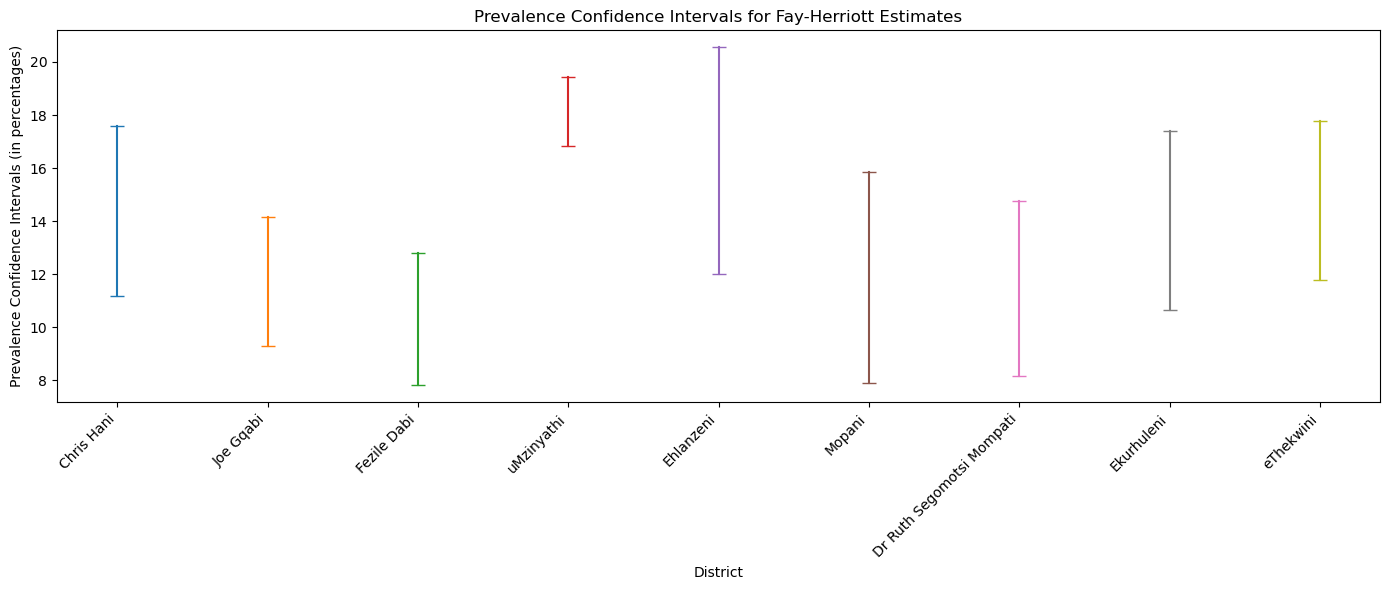

In [51]:
print("\nQ3: ")

# Filter data for Fay-Herriott estimate and districts ending with 'i'
filtered_df = df[(df['Estimate'] == 'Fay-Heriott')& df['District'].str.endswith('i')]

# Plotting confidence intervals with different colors for each district
plt.figure(figsize=(14, 6))

for i, (district, row) in enumerate(filtered_df.iterrows()):
    color = plt.cm.tab10(i)  # use colourmap
    # Plot the confidence intervals
    plt.plot([i, i], [row['Prevalence_LCL'], row['Prevalence_UCL']], marker='_', markersize=10, color=color,)

    # Plot prevalence values
    #plt.scatter(i, row['Prevalence_%'], color=color, marker='o')

plt.xticks(range(len(filtered_df)), filtered_df['District'], rotation=45, ha='right')
plt.title('Prevalence Confidence Intervals for Fay-Herriott Estimates')
plt.xlabel('District')
plt.ylabel('Prevalence Confidence Intervals (in percentages)')
plt.tight_layout()

plt.show()